# ALMA Single Dish Conversion Guide

In [1]:
from importlib.metadata import version
import os

try:
    import xradio

    print("XRADIO version", version("xradio"), "already installed.")
except ImportError as e:
    print(e)
    print("Installing XRADIO")

    os.system("pip install xradio")

    import xradio

    print("xradio version", version("xradio"), " installed.")

XRADIO version 0.0.58 already installed.


## Download dataset

In [2]:
from toolviper.utils.data import list_files

list_files()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ file                                    ┃ dtype          ┃ telescope   ┃ size      ┃ mode                       ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ ea25_cal_small_before_fixed.split.ms    │ CASA MS v2     │ VLA         │ 150170225 │ Holography                 │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ ea25_cal_small_after_fixed.split.ms     │ CASA MS v2     │ VLA         │ 150031008 │ Holography                 │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ J1924-2914.ms.calibrated.split.SPW3     │ CASA MS v2     │ ALMA        │ 35000000  │ Holography                 │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ extract_holog_verification.json         │ json           │ na          │ 967       │ na                         │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ holog_numerical_verification.json       │ json           │ na          │ 1033      │ na                         │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ locit-input-pha.cal                     │ CASA Cal Table │ VLA         │ 92293     │ antenna location cal table │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ panel_cutoff_mask                       │ npy            │ na          │ 27150     │ na                         │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ heuristic_model                         │ bin            │ na          │ 556       │ na                         │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ panel_test_files                        │ na             │ na          │ 402916    │ na                         │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ AA2-Mid-sim_00000.ms                    │ CASA MS v2     │ SKA Mid     │ 14710912  │ Simulated Interferometer   │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ Antennae_M8.img.zarr                    │ zarr           │ ALMA        │ 12626417  │ Interferometer Mosaic      │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ Antennae_North.cal.lsrk.ms              │ CASA MS v2     │ ALMA        │ 189716793 │ Interferometer Mosaic      │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ Antennae_North.cal.lsrk.split.ms        │ CASA MS v2     │ ALMA        │ 1560578   │ Interferometer Mosaic      │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ complex_valued_uv.im                    │ image          │ Simulated   │ 562110    │ Simulated                  │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ demo_simulated.im                       │ image          │ Simulated   │ 15321745  │ Simulated                  │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ no_mask.im                              │ image          │ Simulated   │ 4252      │ Simulated                  │
├─────────────────────────────────────────┼─────────────

In [3]:
import toolviper

toolviper.utils.data.download(file="sdimaging.ms")

[2025-09-04 17:53:26,902]     INFO    viperlog:  Downloading from [cloudflare] .... 


 Download List  
 ─────────────── 
  sdimaging.ms

Output()

## ALMA Single Dish Data

| Dataset | Telescope | Multi-Target | OFF Position | Ephemeris | Scan Pattern |
|---------|-----------|:------------:|:------------:|:---------:|:------------:|
| uid___A002_Xced5df_Xf9d9.small | ALMA |   | horizontal |   | raster |
| uid___A002_X1015532_X1926f.small | ALMA |   | relative | x | raster |
| uid___A002_Xe3a5fd_Xe38e.small | ALMA | x | absolute |   | raster |
| uid___A002_Xae00c5_X2e6b.small | ALMA |   | relative | x | fast |

- OFF position: 
    - **absolute**: OFF position has its own field entry in the FIELD table.
    - **relative**: OFF is a fixed position specified as an offset coordinate relative to the ON position.
    - **horizontal**: OFF is also an offset position relative to the ON position but specified so that its elevation value is always close to the ON position (meaning that the OFF position is moving with time).
- Scan pattern: raster scan/fast scan.
    - **raster**: Scan is, as the name indicates, a raster pattern with a relatively long integration time (0.1-1 sec) and channelized spectral window.
    - **fast**: Scan is either a Lissajous or double-circle pattern with short integration time (1 msec) and single-channel spectral window.

In [4]:
import toolviper
ms_file = "uid___A002_Xced5df_Xf9d9.small.ms"
toolviper.utils.data.download(file=ms_file)

[2025-09-04 17:53:32,107]     INFO    viperlog:  Downloading from [cloudflare] .... 


 Download List                      
 ─────────────────────────────────── 
  uid___A002_Xced5df_Xf9d9.small.ms

Output()

## Setup Dask Client

In [5]:
from toolviper.dask import local_client

viper_client = local_client(cores=4, memory_limit="4GB")
viper_client

[2025-09-04 17:53:36,306]     INFO    viperlog:  Module path: /home/fedemp/ws_xradio_dev/venv_xradio_python313/lib/python3.13/site-packages/toolviper 
[2025-09-04 17:53:36,323]  WARNING    viperlog:  It is recommended that the local cache directory be set using the dask_local_dir parameter. 


/home/fedemp/ws_xradio_dev/venv_xradio_python313/lib/python3.13/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 33949 instead
  warnings.warn(


[2025-09-04 17:53:37,629]     INFO    viperlog:  Client <MenrvaClient: 'tcp://127.0.0.1:39537' processes=4 threads=4, memory=14.90 GiB> 


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:33949/status,
Dashboard: http://127.0.0.1:33949/status,Workers: 4
Total threads: 4,Total memory: 14.90 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:39537,Workers: 4
Dashboard: http://127.0.0.1:33949/status,Total threads: 4
Started: Just now,Total memory: 14.90 GiB
Comm: tcp://127.0.0.1:41873,Total threads: 1
Dashboard: http://127.0.0.1:46485/status,Memory: 3.73 GiB
Nanny: tcp://127.0.0.1:36035,


## Convert to Processing Set

In [6]:
from xradio.measurement_set import convert_msv2_to_processing_set
ps_store = ms_file.replace(".ms", ".ps.zarr")

convert_msv2_to_processing_set(
    in_file=ms_file,
    out_file=ps_store,
    parallel_mode="partition",
    overwrite=True,
)

[2025-09-04 17:53:39,825]     INFO    viperlog:  Partition scheme that will be used: ['DATA_DESC_ID', 'OBS_MODE', 'OBSERVATION_ID', 'FIELD_ID'] 
[2025-09-04 17:53:39,914]     INFO    viperlog:  Number of partitions: 20 
[2025-09-04 17:53:39,916]     INFO    viperlog:  OBSERVATION_ID [0], DDI [0], STATE [10], FIELD [1], SCAN [ 2  4  6  8 10 12 14 16 18] 
[2025-09-04 17:53:39,917]     INFO    viperlog:  OBSERVATION_ID [0], DDI [0], STATE [11], FIELD [1], SCAN [ 2  4  6  8 10 12 14 16 18] 
[2025-09-04 17:53:39,919]     INFO    viperlog:  OBSERVATION_ID [0], DDI [0], STATE [12], FIELD [1], SCAN [ 2  4  6  8 10 12 14 16 18] 
[2025-09-04 17:53:39,920]     INFO    viperlog:  OBSERVATION_ID [0], DDI [0], STATE [13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49 51 53], FIELD [1], SCAN [ 3  5  7  9 11 13 15 17] 
[2025-09-04 17:53:39,922]     INFO    viperlog:  OBSERVATION_ID [0], DDI [0], STATE [14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48 50 52], FIELD [1], SCAN [ 3  5  7  9 11 

## Processing Set

In [7]:
from xradio.measurement_set import open_processing_set

import pandas as pd
pd.set_option('display.max_colwidth', 1000)

ps_xdt = open_processing_set(ps_store)
ps_xdt.xr_ps.summary()

,name,intents,shape,polarization,scan_name,spw_name,spw_intent,field_name,source_name,line_name,field_coords,start_frequency,end_frequency
0,uid___A002_Xced5df_Xf9d9.small_00,"[CALIBRATE_ATMOSPHERE#OFF_SOURCE, CALIBRATE_WVR#OFF_SOURCE]","(135, 2, 3, 2)","[XX, YY]","[10, 12, 14, 16, 18, 2, 4, 6, 8]",X1204293883#ALMA_RB_06#BB_1#SW-01#FULL_RES_0,UNSPECIFIED,[NGC1097_1],[NGC1097_1],[CO_v_0_2_1(ID=3768101)],"[icrs, 2h46m19.09s, -30d16m30.18s]",2.295643e+11,2.295648e+11
1,uid___A002_Xced5df_Xf9d9.small_01,"[CALIBRATE_ATMOSPHERE#AMBIENT, CALIBRATE_WVR#AMBIENT]","(135, 2, 3, 2)","[XX, YY]","[10, 12, 14, 16, 18, 2, 4, 6, 8]",X1204293883#ALMA_RB_06#BB_1#SW-01#FULL_RES_0,UNSPECIFIED,[NGC1097_1],[NGC1097_1],[CO_v_0_2_1(ID=3768101)],"[icrs, 2h46m19.09s, -30d16m30.18s]",2.295643e+11,2.295648e+11
2,uid___A002_Xced5df_Xf9d9.small_02,"[CALIBRATE_ATMOSPHERE#HOT, CALIBRATE_WVR#HOT]","(135, 2, 3, 2)","[XX, YY]","[10, 12, 14, 16, 18, 2, 4, 6, 8]",X1204293883#ALMA_RB_06#BB_1#SW-01#FULL_RES_0,UNSPECIFIED,[NGC1097_1],[NGC1097_1],[CO_v_0_2_1(ID=3768101)],"[icrs, 2h46m19.09s, -30d16m30.18s]",2.295643e+11,2.295648e+11
3,uid___A002_Xced5df_Xf9d9.small_03,[OBSERVE_TARGET#OFF_SOURCE],"(2844, 2, 3, 2)","[XX, YY]","[11, 13, 15, 17, 3, 5, 7, 9]",X1204293883#ALMA_RB_06#BB_1#SW-01#FULL_RES_0,UNSPECIFIED,[NGC1097_1],[NGC1097_1],[CO_v_0_2_1(ID=3768101)],"[icrs, 2h46m19.09s, -30d16m30.18s]",2.295643e+11,2.295648e+11
4,uid___A002_Xced5df_Xf9d9.small_04,[OBSERVE_TARGET#ON_SOURCE],"(5850, 2, 3, 2)","[XX, YY]","[11, 13, 15, 17, 3, 5, 7, 9]",X1204293883#ALMA_RB_06#BB_1#SW-01#FULL_RES_0,UNSPECIFIED,[NGC1097_1],[NGC1097_1],[CO_v_0_2_1(ID=3768101)],"[icrs, 2h46m19.09s, -30d16m30.18s]",2.295643e+11,2.295648e+11
5,uid___A002_Xced5df_Xf9d9.small_05,"[CALIBRATE_ATMOSPHERE#OFF_SOURCE, CALIBRATE_WVR#OFF_SOURCE]","(135, 2, 3, 2)","[XX, YY]","[10, 12, 14, 16, 18, 2, 4, 6, 8]",X1204293883#ALMA_RB_06#BB_2#SW-01#FULL_RES_1,UNSPECIFIED,[NGC1097_1],[NGC1097_1],[Continuum(ID=0)],"[icrs, 2h46m19.09s, -30d16m30.18s]",2.320078e+11,2.320390e+11
6,uid___A002_Xced5df_Xf9d9.small_06,"[CALIBRATE_ATMOSPHERE#AMBIENT, CALIBRATE_WVR#AMBIENT]","(135, 2, 3, 2)","[XX, YY]","[10, 12, 14, 16, 18, 2, 4, 6, 8]",X1204293883#ALMA_RB_06#BB_2#SW-01#FULL_RES_1,UNSPECIFIED,[NGC1097_1],[NGC1097_1],[Continuum(ID=0)],"[icrs, 2h46m19.09s, -30d16m30.18s]",2.320078e+11,2.320390e+11
7,uid___A002_Xced5df_Xf9d9.small_07,"[CALIBRATE_ATMOSPHERE#HOT, CALIBRATE_WVR#HOT]","(135, 2, 3, 2)","[XX, YY]","[10, 12, 14, 16, 18, 2, 4, 6, 8]",X1204293883#ALMA_RB_06#BB_2#SW-01#FULL_RES_1,UNSPECIFIED,[NGC1097_1],[NGC1097_1],[Continuum(ID=0)],"[icrs, 2h46m19.09s, -30d16m30.18s]",2.320078e+11,2.320390e+11
8,uid___A002_Xced5df_Xf9d9.small_08,[OBSERVE_TARGET#OFF_SOURCE],"(2844, 2, 3, 2)","[XX, YY]","[11, 13, 15, 17, 3, 5, 7, 9]",X1204293883#ALMA_RB_06#BB_2#SW-01#FULL_RES_1,UNSPECIFIED,[NGC1097_1],[NGC1097_1],[Continuum(ID=0)],"[icrs, 2h46m19.09s, -30d16m30.18s]",2.320078e+11,2.320390e+11
9,uid___A002_Xced5df_Xf9d9.small_09,[OBSERVE_TARGET#ON_SOURCE],"(5850, 2, 3, 2)","[XX, YY]","[11, 13, 15, 17, 3, 5, 7, 9]",X1204293883#ALMA_RB_06#BB_2#SW-01#FULL_RES_1,UNSPECIFIED,[NGC1097_1],[NGC1097_1],[Continuum(ID=0)],"[icrs, 2h46m19.09s, -30d16m30.18s]",2.320078e+11,2.320390e+11


## MSv4

In [8]:
sub_ps_xdt = ps_xdt.xr_ps.query(intents="OBSERVE_TARGET#OFF_SOURCE")
sub_ps_xdt.xr_ps.summary()

,name,intents,shape,polarization,scan_name,spw_name,spw_intent,field_name,source_name,line_name,field_coords,start_frequency,end_frequency
0,uid___A002_Xced5df_Xf9d9.small_03,[OBSERVE_TARGET#OFF_SOURCE],"(2844, 2, 3, 2)","[XX, YY]","[11, 13, 15, 17, 3, 5, 7, 9]",X1204293883#ALMA_RB_06#BB_1#SW-01#FULL_RES_0,UNSPECIFIED,[NGC1097_1],[NGC1097_1],[CO_v_0_2_1(ID=3768101)],"[icrs, 2h46m19.09s, -30d16m30.18s]",2.295643e+11,2.295648e+11
1,uid___A002_Xced5df_Xf9d9.small_08,[OBSERVE_TARGET#OFF_SOURCE],"(2844, 2, 3, 2)","[XX, YY]","[11, 13, 15, 17, 3, 5, 7, 9]",X1204293883#ALMA_RB_06#BB_2#SW-01#FULL_RES_1,UNSPECIFIED,[NGC1097_1],[NGC1097_1],[Continuum(ID=0)],"[icrs, 2h46m19.09s, -30d16m30.18s]",2.320078e+11,2.320390e+11
2,uid___A002_Xced5df_Xf9d9.small_13,[OBSERVE_TARGET#OFF_SOURCE],"(2844, 2, 3, 2)","[XX, YY]","[11, 13, 15, 17, 3, 5, 7, 9]",X1204293883#ALMA_RB_06#BB_3#SW-01#FULL_RES_2,UNSPECIFIED,[NGC1097_1],[NGC1097_1],[H2CO_Continuum(ID=0)],"[icrs, 2h46m19.09s, -30d16m30.18s]",2.161367e+11,2.161406e+11
3,uid___A002_Xced5df_Xf9d9.small_18,[OBSERVE_TARGET#OFF_SOURCE],"(2844, 2, 3, 2)","[XX, YY]","[11, 13, 15, 17, 3, 5, 7, 9]",X1204293883#ALMA_RB_06#BB_4#SW-01#FULL_RES_3,UNSPECIFIED,[NGC1097_1],[NGC1097_1],[C18O_2_1(ID=3768339)],"[icrs, 2h46m19.09s, -30d16m30.18s]",2.179697e+11,2.179736e+11


In [9]:
ms_xdt = sub_ps_xdt['uid___A002_Xced5df_Xf9d9.small_03']
ms_xdt

<xarray.DataTree 'uid___A002_Xced5df_Xf9d9.small_03'>
Group: /uid___A002_Xced5df_Xf9d9.small_03
│   Dimensions:                     (time: 2844, antenna_name: 2, frequency: 3,
│                                    polarization: 2)
│   Coordinates:
│     * antenna_name                (antenna_name) <U9 72B 'PM01_T703' 'PM02_T701'
│       field_name                  (time) <U29 330kB ...
│     * frequency                   (frequency) float64 24B 2.296e+11 ... 2.296e+11
│     * polarization                (polarization) <U2 16B 'XX' 'YY'
│       scan_name                   (time) <U21 239kB '3' '3' '3' ... '17' '17' '17'
│       telescope_name              (antenna_name) <U4 32B ...
│     * time                        (time) float64 23kB 1.53e+09 ... 1.53e+09
│   Data variables:
│       EFFECTIVE_INTEGRATION_TIME  (time, antenna_name) float64 46kB ...
│       FLAG                        (time, antenna_name, frequency, polarization) bool 34kB ...
│       SPECTRUM                    (time, antenna_name, frequency, polarization) float32 137kB ...
│       TIME_CENTROID               (time, antenna_name) float64 46kB ...
│       WEIGHT                      (time, antenna_name, frequency, polarization) float32 137kB ...
│   Attributes:
│       creation_date:     2025-09-04T15:53:45.731782+00:00
│       creator:           {'software_name': 'xradio', 'version': '0.0.58'}
│       data_groups:       {'base': {'correlated_data': 'SPECTRUM', 'date': '2025...
│       observation_info:  {'intents': ['OBSERVE_TARGET#OFF_SOURCE'], 'observer':...
│       processor_info:    {'sub_type': 'ALMA_ACA', 'type': 'CORRELATOR'}
│       schema_version:    4.0.-9988
│       type:              spectrum
├── Group: /uid___A002_Xced5df_Xf9d9.small_03/antenna_xds
│       Dimensions:                 (antenna_name: 2, cartesian_pos_label: 3,
│                                    receptor_label: 2)
│       Coordinates:
│         * cartesian_pos_label     (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
│           mount                   (antenna_name) <U6 48B ...
│           polarization_type       (antenna_name, receptor_label) <U1 16B ...
│         * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
│           station_name            (antenna_name) <U4 32B ...
│           telescope_name          (antenna_name) <U4 32B ...
│       Data variables:
│           ANTENNA_DISH_DIAMETER   (antenna_name) float64 16B ...
│           ANTENNA_POSITION        (antenna_name, cartesian_pos_label) float64 48B ...
│           ANTENNA_RECEPTOR_ANGLE  (antenna_name, receptor_label) float64 32B ...
│       Attributes:
│           overall_telescope_name:  ALMA
│           relocatable_antennas:    True
│           type:                    antenna
├── Group: /uid___A002_Xced5df_Xf9d9.small_03/field_and_source_base_xds
│       Dimensions:                           (field_name: 1, sky_dir_label: 2,
│                                              line_label: 1)
│       Coordinates:
│         * field_name                        (field_name) <U29 116B 'NGC1097_1'
│         * line_label                        (line_label) <U21 84B '0'
│           line_name                         (field_name, line_label) <U22 88B 'CO_v...
│         * sky_dir_label                     (sky_dir_label) <U3 24B 'ra' 'dec'
│           source_name                       (field_name) <U29 116B 'NGC1097_1'
│       Data variables:
│           FIELD_REFERENCE_CENTER_DIRECTION  (field_name, sky_dir_label) float64 16B ...
│           LINE_REST_FREQUENCY               (field_name, line_label) float64 8B ...
│           LINE_SYSTEMIC_VELOCITY            (field_name, line_label) float64 8B ...
│           SOURCE_DIRECTION                  (field_name, sky_dir_label) float64 16B ...
│       Attributes:
│           type:     field_and_source
├── Group: /uid___A002_Xced5df_Xf9d9.small_03/pointing_xds
│       Dimensions:                 (time_pointing: 75400, antenna_name: 2,
│                                    local_s

### Partition_info

In [10]:
ms_xdt.xr_ms.get_partition_info()

{'spectral_window_name': 'X1204293883#ALMA_RB_06#BB_1#SW-01#FULL_RES_0',
 'spectral_window_intent': 'UNSPECIFIED',
 'field_name': [np.str_('NGC1097_1')],
 'polarization_setup': [np.str_('XX'), np.str_('YY')],
 'scan_name': [np.str_('11'),
  np.str_('13'),
  np.str_('15'),
  np.str_('17'),
  np.str_('3'),
  np.str_('5'),
  np.str_('7'),
  np.str_('9')],
 'source_name': [np.str_('NGC1097_1')],
 'intents': ['OBSERVE_TARGET#OFF_SOURCE'],
 'line_name': [np.str_('CO_v_0_2_1(ID=3768101)')],
 'data_group_name': 'base'}

### Processor_info

In [11]:
ms_xdt.processor_info

{'sub_type': 'ALMA_ACA', 'type': 'CORRELATOR'}

### Observation_info

In [12]:
ms_xdt.observation_info

{'intents': ['OBSERVE_TARGET#OFF_SOURCE'],
 'observer': ['schinnerer'],
 'project': 'uid://A001/X1221/Xa61',
 'release_date': '1858-11-17T00:00:00.000000000'}

### Antenna_xds

In [13]:
ms_xdt.antenna_xds

<xarray.DataTree 'antenna_xds'>
Group: /uid___A002_Xced5df_Xf9d9.small_03/antenna_xds
    Dimensions:                 (time: 2844, antenna_name: 2, frequency: 3,
                                 polarization: 2, cartesian_pos_label: 3,
                                 receptor_label: 2)
    Coordinates:
      * cartesian_pos_label     (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
        mount                   (antenna_name) <U6 48B ...
        polarization_type       (antenna_name, receptor_label) <U1 16B ...
      * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
        station_name            (antenna_name) <U4 32B ...
        telescope_name          (antenna_name) <U4 32B ...
    Inherited coordinates:
      * antenna_name            (antenna_name) <U9 72B 'PM01_T703' 'PM02_T701'
      * frequency               (frequency) float64 24B 2.296e+11 ... 2.296e+11
      * polarization            (polarization) <U2 16B 'XX' 'YY'
      * time                    (time) float64 23kB 1.53e+09 1.53e+09 ... 1.53e+09
    Data variables:
        ANTENNA_DISH_DIAMETER   (antenna_name) float64 16B ...
        ANTENNA_POSITION        (antenna_name, cartesian_pos_label) float64 48B ...
        ANTENNA_RECEPTOR_ANGLE  (antenna_name, receptor_label) float64 32B ...
    Attributes:
        overall_telescope_name:  ALMA
        relocatable_antennas:    True
        type:                    antenna

### Pointing_xds

In [14]:
pointing_xds = ms_xdt.pointing_xds
pointing_xds

<xarray.DataTree 'pointing_xds'>
Group: /uid___A002_Xced5df_Xf9d9.small_03/pointing_xds
    Dimensions:                 (time: 2844, antenna_name: 2, frequency: 3,
                                 polarization: 2, time_pointing: 75400,
                                 local_sky_dir_label: 2)
    Coordinates:
      * local_sky_dir_label     (local_sky_dir_label) <U3 24B 'az' 'alt'
      * time_pointing           (time_pointing) float64 603kB 1.53e+09 ... 1.53e+09
    Inherited coordinates:
      * antenna_name            (antenna_name) <U9 72B 'PM01_T703' 'PM02_T701'
      * frequency               (frequency) float64 24B 2.296e+11 ... 2.296e+11
      * polarization            (polarization) <U2 16B 'XX' 'YY'
      * time                    (time) float64 23kB 1.53e+09 1.53e+09 ... 1.53e+09
    Data variables:
        POINTING_BEAM           (time_pointing, antenna_name, local_sky_dir_label) float64 2MB ...
        POINTING_DISH_MEASURED  (time_pointing, antenna_name, local_sky_dir_label) float64 2MB ...
        POINTING_OVER_THE_TOP   (time_pointing, antenna_name) bool 151kB ...
    Attributes:
        type:     pointing

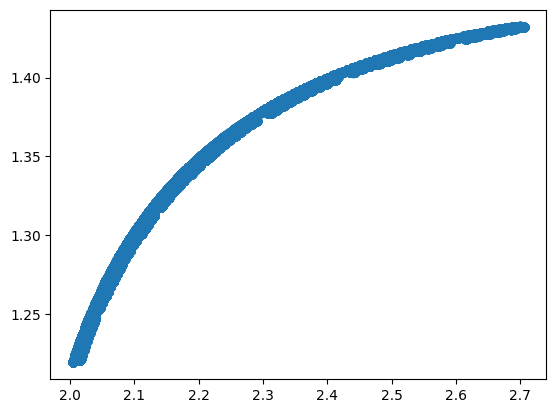

In [15]:
import matplotlib.pyplot as plt

pnt_az = pointing_xds.POINTING_BEAM.sel(local_sky_dir_label='az')
pnt_alt = pointing_xds.POINTING_BEAM.sel(local_sky_dir_label='alt')

plt.figure()
plt.scatter(pnt_az, pnt_alt)
plt.show()

### System Calibration

In [16]:
ms_xdt.system_calibration_xds

<xarray.DataTree 'system_calibration_xds'>
Group: /uid___A002_Xced5df_Xf9d9.small_03/system_calibration_xds
    Dimensions:               (time: 2844, antenna_name: 2, frequency: 3,
                               polarization: 2, time_system_cal: 9,
                               receptor_label: 2, frequency_system_cal: 4096)
    Coordinates:
        antenna_id            (antenna_name) int32 8B ...
      * frequency_system_cal  (frequency_system_cal) int64 33kB 0 1 2 ... 4094 4095
        mount                 (antenna_name) <U6 48B ...
        polarization_type     (antenna_name, receptor_label) <U1 16B ...
      * receptor_label        (receptor_label) <U5 40B 'pol_0' 'pol_1'
        station_name          (antenna_name) <U4 32B ...
        telescope_name        (antenna_name) <U4 32B ...
      * time_system_cal       (time_system_cal) float64 72B 1.53e+09 ... 3.623e+09
    Inherited coordinates:
      * antenna_name          (antenna_name) <U9 72B 'PM01_T703' 'PM02_T701'
      * frequency             (frequency) float64 24B 2.296e+11 2.296e+11 2.296e+11
      * polarization          (polarization) <U2 16B 'XX' 'YY'
      * time                  (time) float64 23kB 1.53e+09 1.53e+09 ... 1.53e+09
    Data variables:
        TCAL                  (antenna_name, time_system_cal, receptor_label, frequency_system_cal) float64 1MB ...
        TRX                   (antenna_name, time_system_cal, receptor_label, frequency_system_cal) float64 1MB ...
        TSKY                  (antenna_name, time_system_cal, receptor_label, frequency_system_cal) float64 1MB ...
        TSYS                  (antenna_name, time_system_cal, receptor_label, frequency_system_cal) float64 1MB ...
    Attributes:
        type:     system_calibration